In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
df = pd.read_csv('winequality-red.csv')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [17]:
df.shape

(1599, 12)

Adding a new column with the classification of the wine: good or bad

1 - good quality

0 - bad quality

In [18]:
def classification(quality):
    if quality >= 7:
        return 1
    else:
        return 0

In [19]:
df['class'] = df['quality'].apply(classification)

Checking if there is any missing value and the type of each variable

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  class                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


Exploratory Analysis

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


Correlation between variables

In [22]:
df_corr = df.corr().round(2)

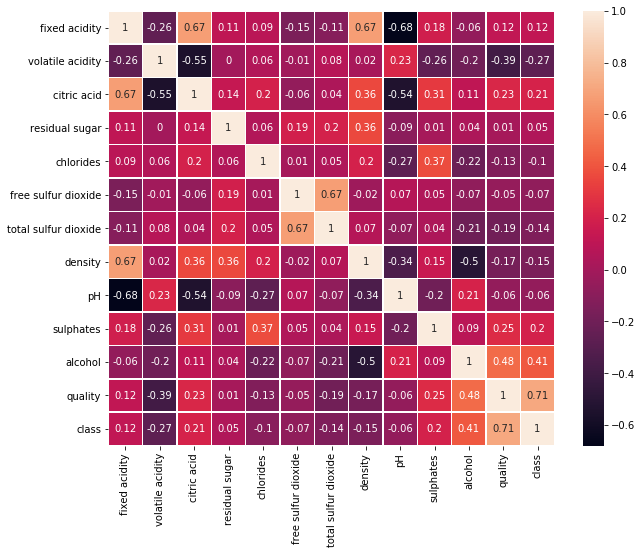

In [23]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot= True, linewidths=.5);

Quality

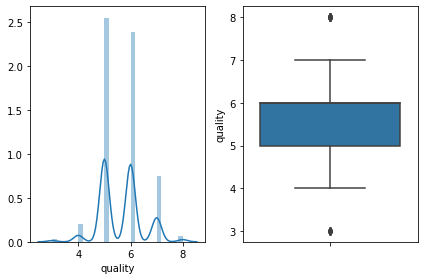

In [24]:
plt.subplots(figsize=(6,4))
plt.subplot(1,2,1)
sns.distplot(df['quality'])
plt.subplot(1,2,2)
sns.boxplot(df['quality'], orient = 'v')
plt.tight_layout()

Proportion of good quality x bad quality

In [25]:
good = df[df['quality'] >= 7].shape[0]
bad = df[df['quality'] < 7].shape[0]
good_pct = round(good*100/(good+bad),2)
bad_pct = round(bad*100/(good+bad),2)

In [26]:
print('Good represents', good_pct,'%', '\nBad represents',bad_pct,'%')

Good represents 13.57 % 
Bad represents 86.43 %


Splitting the data into training, testing and validation

In [33]:
x = df.iloc[:,:-2]
y = df['class']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

## Machine Learning to predict the class

#### Baseline model

In [109]:
y_train.value_counts()

0    825
1    134
Name: class, dtype: int64

In [113]:
bspred = [0] * y_test.shape[0]

In [ ]:
def calculate_metrics(y_test, y_predicted):
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_predicted))
    print('Classification Report:')
    print(classification_report(y_test, y_predicted))
    
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True, fmt='g')

Accuracy: 0.8625
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       276
           1       0.00      0.00      0.00        44

    accuracy                           0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.74      0.86      0.80       320



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


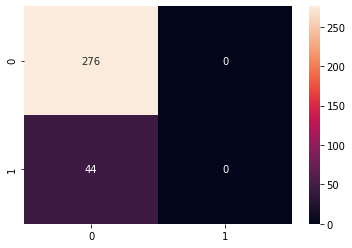

In [114]:
calculate_metrics(y_test, bspred)

#### Logistic Regression

In [36]:
x_train = sm.add_constant(x_train)

In [37]:
model = sm.Logit(y_train,x_train).fit(disp=0)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  959
Model:                          Logit   Df Residuals:                      947
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.2974
Time:                        09:53:02   Log-Likelihood:                -272.55
converged:                       True   LL-Null:                       -387.89
Covariance Type:            nonrobust   LLR p-value:                 3.062e-43
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  242.9091    135.455      1.793      0.073     -22.579     508.397
fixed acidity            0.1870      0.155      1.209      0.227      -0.116       0.490
volatile aci

Adjusting the logistic model w/ backwards method

In [38]:
def remove_features(x,y,columns):
    while len(columns)>1:
        model = sm.Logit(y, x[columns]).fit(disp=0)
        biggest_p = round(model.pvalues, 4).nlargest(1)
        if biggest_p.iloc[0] < 0.05:
            return model
        else:
            print(f'{biggest_p.index[0]} was removed!')
            columns = columns.drop(biggest_p.index)

In [39]:
final_model = remove_features(x_train,y_train,x_train.columns)

pH was removed!
free sulfur dioxide was removed!
citric acid was removed!
chlorides was removed!


In [40]:
print(final_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  959
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                            7
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.2902
Time:                        09:53:02   Log-Likelihood:                -275.33
converged:                       True   LL-Null:                       -387.89
Covariance Type:            nonrobust   LLR p-value:                 5.425e-45
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  246.8746    118.132      2.090      0.037      15.340     478.409
fixed acidity            0.2757      0.102      2.707      0.007       0.076       0.475
volatile aci

In [41]:
final_model.params

const                   246.874631
fixed acidity             0.275721
volatile acidity         -3.063080
residual sugar            0.222379
total sulfur dioxide     -0.018000
density                -259.946563
sulphates                 2.554191
alcohol                   0.712297
dtype: float64

Applying the model in the test-set

In [42]:
x_test = x_test[['fixed acidity', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
x_test.insert(0,'const',1)

In [43]:
RegLog=final_model.predict(x_test)

In [44]:
predictions = []
def logistic_to_binary(list):
    for item in list:
        if item >0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [45]:
logPred = logistic_to_binary(RegLog)

### Logistic Model Accuracy

Accuracy: 0.865625
Balanced Accuracy: 0.5973320158102766
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       276
           1       0.53      0.23      0.32        44

    accuracy                           0.87       320
   macro avg       0.71      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



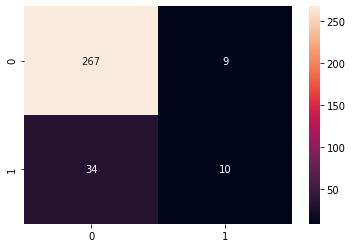

In [57]:
calculate_metrics(y_test, logPred)

### Naive Bayes

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [73]:
modelnb = MultinomialNB().fit(x_train,y_train)
prednb = modelnb.predict(x_test)

#### NB Accuracy

Accuracy: 0.56875
Balanced Accuracy: 0.5685111989459816
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69       276
           1       0.17      0.57      0.27        44

    accuracy                           0.57       320
   macro avg       0.53      0.57      0.48       320
weighted avg       0.79      0.57      0.64       320



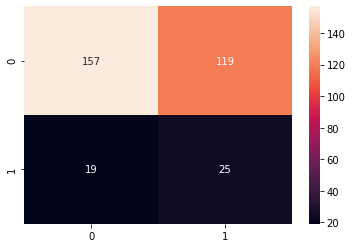

In [74]:
calculate_metrics(y_test, prednb)

#### SVM

In [76]:
svmodel = svm.SVC().fit(x_train, y_train)

In [77]:
svmpredict = svmodel.predict(x_test)

#### SVM Accuracy

Accuracy: 0.865625
Balanced Accuracy: 0.5113636363636364
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       276
           1       1.00      0.02      0.04        44

    accuracy                           0.87       320
   macro avg       0.93      0.51      0.49       320
weighted avg       0.88      0.87      0.81       320



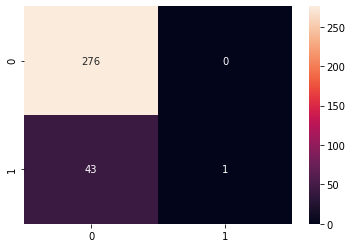

In [78]:
calculate_metrics(y_test, svmpredict)

#### Decision trees

In [81]:
treemodel = tree.DecisionTreeClassifier().fit(x_train, y_train)

In [83]:
treepredict=treemodel.predict(x_test)

Accuracy: 0.865625
Balanced Accuracy: 0.7597167325428196
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       276
           1       0.51      0.61      0.56        44

    accuracy                           0.87       320
   macro avg       0.72      0.76      0.74       320
weighted avg       0.88      0.87      0.87       320



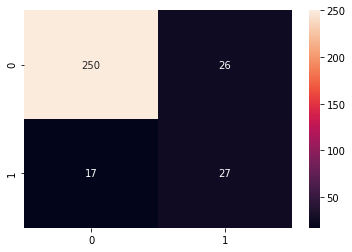

In [84]:
calculate_metrics(y_test, treepredict)

#### Random Forest

In [86]:
rfmodel = RandomForestClassifier(n_estimators = 10).fit(x_train, y_train)

In [88]:
rfprediction = rfmodel.predict(x_test)

Accuracy: 0.89375
Balanced Accuracy: 0.6805006587615283
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       276
           1       0.71      0.39      0.50        44

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320



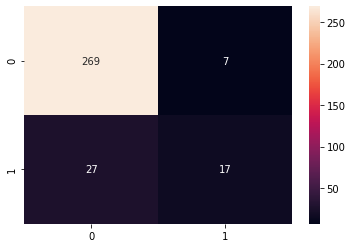

In [89]:
calculate_metrics(y_test, rfprediction)

#### KNN

In [91]:
knnmodel = neighbors.KNeighborsClassifier(n_neighbors = 15).fit(x_train, y_train)

In [93]:
knnpred = knnmodel.predict(x_test)

Accuracy: 0.83125
Balanced Accuracy: 0.4914361001317523
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       276
           1       0.08      0.02      0.04        44

    accuracy                           0.83       320
   macro avg       0.47      0.49      0.47       320
weighted avg       0.75      0.83      0.79       320



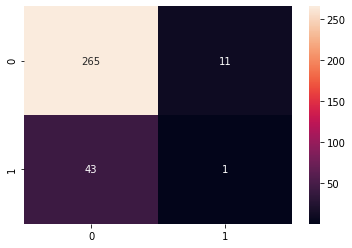

In [94]:
calculate_metrics(y_test, knnpred)

#### Gradient boosting

In [97]:
gbmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=123).fit(x_train, y_train)

In [99]:
gbpred = gbmodel.predict(x_test)

Accuracy: 0.865625
Balanced Accuracy: 0.6641963109354414
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       276
           1       0.52      0.39      0.44        44

    accuracy                           0.87       320
   macro avg       0.71      0.66      0.68       320
weighted avg       0.85      0.87      0.86       320



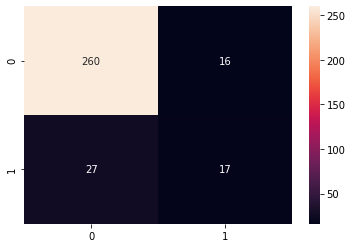

In [101]:
calculate_metrics(y_test, gbpred)

#### Validating the chosen algorithm

In [116]:
rfval = rfmodel.predict(x_val)

Accuracy: 0.915625
Balanced Accuracy: 0.7311342275755087
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       281
           1       0.73      0.49      0.58        39

    accuracy                           0.92       320
   macro avg       0.83      0.73      0.77       320
weighted avg       0.91      0.92      0.91       320



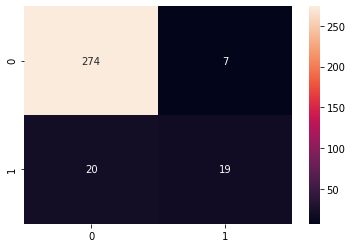

In [117]:
calculate_metrics(y_val, rfval)